Commerce shipping dataset is that comes with several features and based on that need to find either the product shipped on time or not. In this notebook I've performed almost all steps that a data science project need. I've performed:
1. Exploratory Data Analysis
2. Feature Engineering
3. Feature Selection
4. Machine Learning & Evaluate Performance
5. Deep Learning (Using Sequential NN Model & Evaluate Performance)
6. Save model for later use.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn

# for ignoring any unwanted warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Train features dataframe
train_x = pd.read_csv('X_train.csv')

# Train target data
train_y = pd.read_csv('y_train.csv')
train_y.head()

,ID,Reached.on.Time_Y.N
0,6045,0
1,44,1
2,7940,1
3,1596,1
4,4395,1


In [3]:
# Now let's merger the two dataframe and make one
df = pd.merge(train_x, train_y, how = 'inner', on = 'ID')

In [4]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,6045,A,Flight,4,3,266,5,high,F,5,1590,0
1,44,F,Ship,3,1,174,2,low,M,44,1556,1
2,7940,F,Road,4,1,154,10,high,M,10,5674,1
3,1596,F,Ship,4,3,158,3,medium,F,27,1207,1
4,4395,A,Flight,5,3,175,3,low,M,7,4833,1


In [5]:
# Now checking some basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6598 entries, 0 to 6597
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   6598 non-null   int64 
 1   Warehouse_block      6598 non-null   object
 2   Mode_of_Shipment     6598 non-null   object
 3   Customer_care_calls  6598 non-null   object
 4   Customer_rating      6598 non-null   int64 
 5   Cost_of_the_Product  6598 non-null   int64 
 6   Prior_purchases      6598 non-null   int64 
 7   Product_importance   6598 non-null   object
 8   Gender               6598 non-null   object
 9   Discount_offered     6598 non-null   int64 
 10  Weight_in_gms        6598 non-null   int64 
 11  Reached.on.Time_Y.N  6598 non-null   int64 
dtypes: int64(7), object(5)
memory usage: 670.1+ KB


Here the dataset contain total 6598 entries with 12 columns out of which one is the target.

In [6]:
# check if is there any null value
df.isnull().sum()/len(df)

ID                     0.0
Warehouse_block        0.0
Mode_of_Shipment       0.0
Customer_care_calls    0.0
Customer_rating        0.0
Cost_of_the_Product    0.0
Prior_purchases        0.0
Product_importance     0.0
Gender                 0.0
Discount_offered       0.0
Weight_in_gms          0.0
Reached.on.Time_Y.N    0.0
dtype: float64

There is no null value in the dataset. Let's see some basic statistic of the dataset.

In [7]:
df.drop(['ID', 'Reached.on.Time_Y.N'], axis = 1).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Customer_rating,6598.0,2.991361,1.409624,1.0,2.00,3.0,4.0,5.0
Cost_of_the_Product,6598.0,210.393149,48.258089,96.0,170.00,214.0,251.0,310.0
Prior_purchases,6598.0,3.577751,1.511394,2.0,3.00,3.0,4.0,10.0
Discount_offered,6598.0,13.353592,16.187267,1.0,4.00,7.0,10.0,65.0
Weight_in_gms,6598.0,3604.191119,1635.697627,1001.0,1834.25,4119.5,5027.5,7684.0


Here some basic statistics like mean, min, max, standard deviation, etc are show for only the numerical variables.
Now let's do some exploratory data analysis to find how the features affect the target.

### EDA

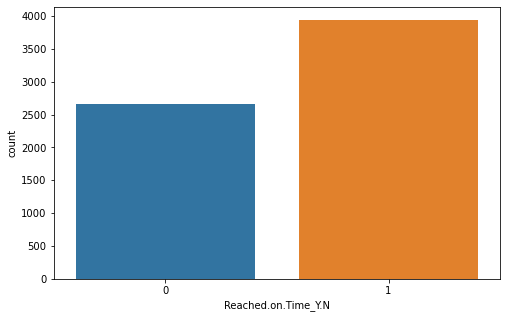

In [8]:
# First let's see how many products are reached on time and how many are not

plt.figure(figsize = (8,5))
sns.countplot(data = df, x = 'Reached.on.Time_Y.N')
plt.show()

Here we can see most of the product are reached on time. Let's see the percentage of those using a pieplot.

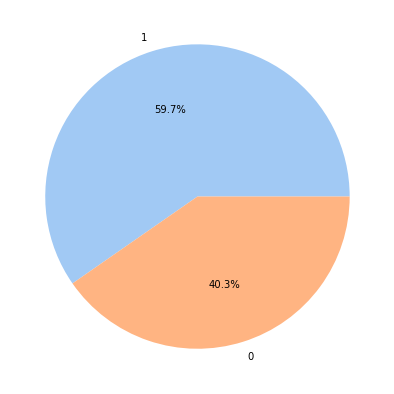

In [9]:
plt.figure(figsize=(12,7))
colors = sns.color_palette('pastel')[0:2]
plt.pie(df['Reached.on.Time_Y.N'].value_counts(), labels = df['Reached.on.Time_Y.N'].value_counts().keys(), autopct='%0.1f%%', colors = colors)
plt.show()

Here almost 60% of the products are reached on time and almost 40% are not.
Let's start with the warehouse and how how many warehouse are there and depending on that the shippment is done or not

F    2262
B    1116
A    1090
D    1069
C    1061
Name: Warehouse_block, dtype: int64


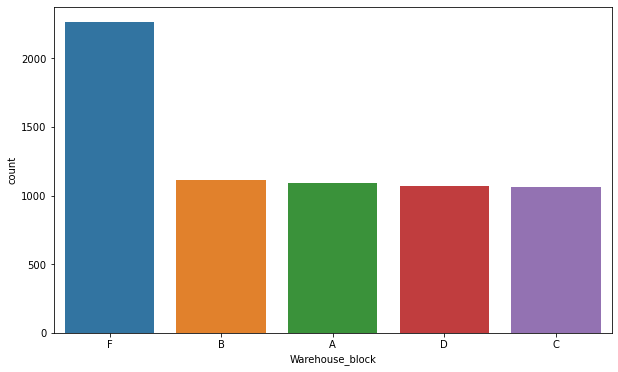

In [10]:
# viewing the actual number of warehouse_block
print(df['Warehouse_block'].value_counts())

# Visually viewing
plt.figure(figsize = (10,6))
sns.countplot(data = df, x = 'Warehouse_block', order= df['Warehouse_block'].value_counts().index)
plt.show()

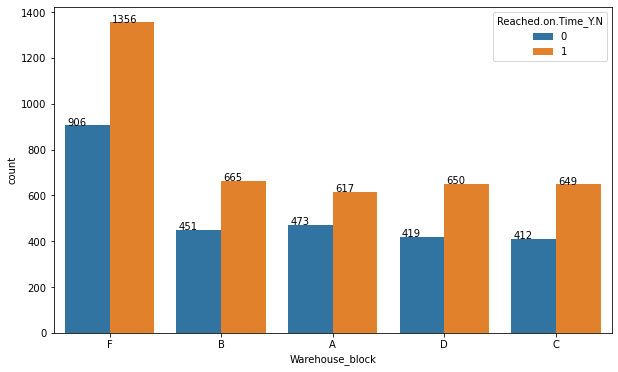

In [11]:
# Visually viewing with the delivered or not
ax1 = plt.figure(figsize = (10,6))
ax1 =sns.countplot(data = df, x = 'Warehouse_block', hue = 'Reached.on.Time_Y.N', order= df['Warehouse_block'].value_counts().index)

for p in ax1.patches:
    ax1.annotate("{:}".format(p.get_height()),
                xy=(p.get_x()+0.02, p.get_height()+0.01))
plt.show()

Comparing to other barehouse_block, less products from  Warehouse_block "A" reached on time. The warehouse "D" & "C" delivers 650 & 649 on time whereas the "A" delivers 617 but it should be more than "D" & "C"

Let's check the shipping method with respect to reached on time

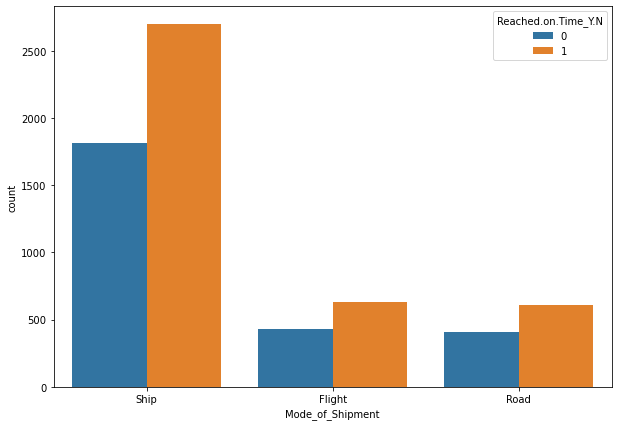

In [12]:
ax1 = plt.figure(figsize = (10,7))
ax1 = sns.countplot(data = df, x = 'Mode_of_Shipment', hue = 'Reached.on.Time_Y.N', 
                    order=df['Mode_of_Shipment'].value_counts().index)
plt.show()

Now let's explore how the delivery is related with the price and the discount price.

<Figure size 720x576 with 0 Axes>

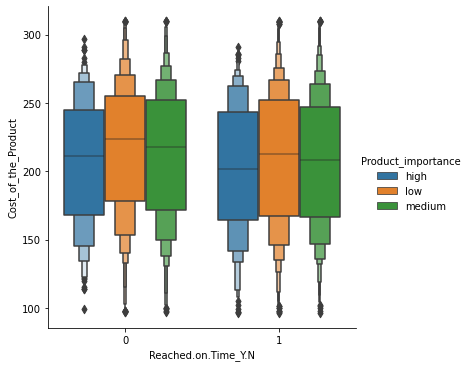

In [13]:
plt.figure(figsize = (10,8))
sns.catplot(data = df, x = 'Reached.on.Time_Y.N', y = 'Cost_of_the_Product',
            hue = 'Product_importance', kind = 'boxen')
plt.show()

Here we can see almost same stats for both reached on time or not. So it can stated that the price of the product doesn't affect on delivery on time. Now let's do some feature engineering on the dataset for ML & DL

### Feature Engineering

Sequence followed for this
1. Taking care missing data
2. Handing Outliers
3. Encoding Categorical Variables
4. Feature Selection

In this notebook I'll perform both ML & DL. For ML "RandomForestClassifier" will be used which doesn't require feature scaling for this I'll skip it right now. Later on before applying Neural Network I'll do some feature scaling.

In [14]:
# Checking the top five rows of the dataset.
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,6045,A,Flight,4,3,266,5,high,F,5,1590,0
1,44,F,Ship,3,1,174,2,low,M,44,1556,1
2,7940,F,Road,4,1,154,10,high,M,10,5674,1
3,1596,F,Ship,4,3,158,3,medium,F,27,1207,1
4,4395,A,Flight,5,3,175,3,low,M,7,4833,1


In [15]:
# checking the null values
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

There is not null value in the dataset.  Next step let's take care of outliers. I'll consider variables like "Cost_of_the_Product", "Prior_purchases" "Discount_offered", "Weight_in_gms" This is because these have a huge range between minimum and maximum

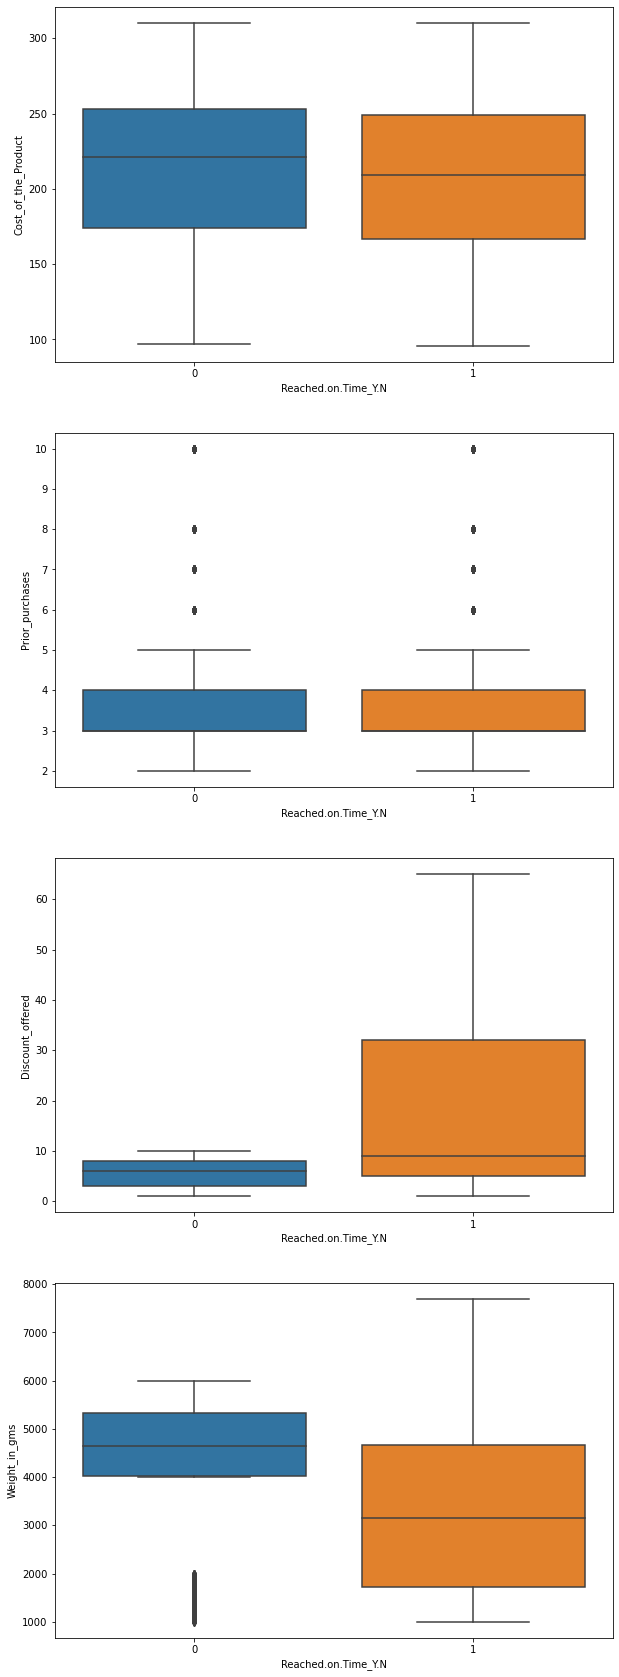

In [16]:
# First let's check if there is any outliers or not using boxplot
# setting up # of plots and size
fig, axes = plt.subplots(nrows=4, ncols=1)
fig.set_size_inches(10,30)

# Plots
sns.boxplot(data = df, x = 'Reached.on.Time_Y.N', y ='Cost_of_the_Product', ax = axes[0])
sns.boxplot(data = df, x = 'Reached.on.Time_Y.N', y ='Prior_purchases', ax = axes[1])
sns.boxplot(data = df, x = 'Reached.on.Time_Y.N', y ='Discount_offered', ax = axes[2])
sns.boxplot(data = df, x = 'Reached.on.Time_Y.N', y ='Weight_in_gms', ax = axes[3])
plt.show()

Here only "Prior_purchases" & "Weight_in_gms" some outliers. Let's findout them. For this task I'll use IQR (Inter Quartile Range) to detect the outliers

In [17]:
# create a function to detect outlier

def detect_outlier(data):
    sorted(data) # sorting the data
    q1, q3 = np.percentile(data, [25, 75]) # Grabbing the first and third percentile
    IQR = q3 -q1
    lower_bound = q1 - (3 * IQR) # For extreme outliers I'm just multiply by 3 instead of 1.5
    upper_bound = q3 + (3 * IQR)
    return lower_bound, upper_bound


In [18]:
# detecting for 'Prior_purchases'

lowerbound_p, upperbound_p = detect_outlier(df['Prior_purchases'])
print(f'Lower Bound: {lowerbound_p}')
print(f'Upper Bound: {upperbound_p}')

Lower Bound: 0.0
Upper Bound: 7.0


In [19]:
# Here the lower bound is 1.5 and upper bound is 5.5. Let's find which values are out of these range

df[(df['Prior_purchases']> upperbound_p) | (df['Prior_purchases']<lowerbound_p)]

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
2,7940,F,Road,4,1,154,10,high,M,10,5674,1
18,1883,C,Ship,4,1,201,10,medium,M,37,3402,1
20,9126,F,Ship,2,4,204,10,low,F,4,4679,1
37,10650,F,Ship,4,5,261,10,low,M,7,5208,0
85,229,D,Ship,3,2,164,10,high,M,14,1375,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6417,2978,F,Ship,3,4,212,8,low,F,34,2750,1
6466,6245,C,Ship,4,2,201,8,medium,F,9,5146,0
6482,3357,A,Ship,4,3,163,8,medium,F,6,5739,0
6514,1185,A,Ship,3,5,148,10,high,F,35,1597,1


In [20]:
print(len(df[df['Prior_purchases']==10]))
print(len(df[df['Prior_purchases']==8]))

104
73


There are almost 177 values contain outliers. and these outliers has only two value "104 & 73" Now let's check for other column

In [21]:
# detecting for 'Weight_in_gms'

lowerbound, upperbound = detect_outlier(df['Weight_in_gms'])
print(f'Lower Bound: {lowerbound}')
print(f'Upper Bound: {upperbound}')

# Detect the outliers
df[(df['Weight_in_gms']> upperbound) | (df['Weight_in_gms']<lowerbound)]

Lower Bound: -7745.5
Upper Bound: 14607.25


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N


 Here we can see that some values are Negative which can't be happen for weight. So there is no outliers for this. Now let's drop those 177 rows and remove outliers.

In [22]:
df.drop(df[(df['Prior_purchases']> upperbound_p) | (df['Prior_purchases']<lowerbound_p)].index, inplace = True)

In [23]:
# Let's check if there is any outliers or not
df[(df['Prior_purchases']> upperbound_p) | (df['Prior_purchases']<lowerbound_p)]

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N


The outliers are gone. Now let's encode the categorical features.

While EDA we've seen that the delivery importance doesn't affect on intime delivery. So, I just use one hot encoding for all the features.

In [24]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,6045,A,Flight,4,3,266,5,high,F,5,1590,0
1,44,F,Ship,3,1,174,2,low,M,44,1556,1
3,1596,F,Ship,4,3,158,3,medium,F,27,1207,1
4,4395,A,Flight,5,3,175,3,low,M,7,4833,1
5,1991,C,Ship,3,3,139,4,high,M,17,1137,1


In [25]:
# encoding
df_encode = pd.get_dummies(df[['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']], drop_first= True)

In [26]:
# concating with main dataframe

df = pd.concat([df, df_encode], axis = 1)

In [27]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,...,Reached.on.Time_Y.N,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_low,Product_importance_medium,Gender_M
0,6045,A,Flight,4,3,266,5,high,F,5,...,0,0,0,0,0,0,0,0,0,0
1,44,F,Ship,3,1,174,2,low,M,44,...,1,0,0,0,1,0,1,1,0,1
3,1596,F,Ship,4,3,158,3,medium,F,27,...,1,0,0,0,1,0,1,0,1,0
4,4395,A,Flight,5,3,175,3,low,M,7,...,1,0,0,0,0,0,0,1,0,1
5,1991,C,Ship,3,3,139,4,high,M,17,...,1,0,1,0,0,0,1,0,0,1


In [28]:
# Now let's drop the unnecessary columns

df.drop(['ID','Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender'], axis = 1, inplace = True)

In [29]:
df.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_low,Product_importance_medium,Gender_M
0,4,3,266,5,5,1590,0,0,0,0,0,0,0,0,0,0
1,3,1,174,2,44,1556,1,0,0,0,1,0,1,1,0,1
3,4,3,158,3,27,1207,1,0,0,0,1,0,1,0,1,0
4,5,3,175,3,7,4833,1,0,0,0,0,0,0,1,0,1
5,3,3,139,4,17,1137,1,0,1,0,0,0,1,0,0,1


In [30]:
# before moving ahead let's check the datatypes of each variables so that later there will be no error
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6421 entries, 0 to 6597
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Customer_care_calls        6421 non-null   object
 1   Customer_rating            6421 non-null   int64 
 2   Cost_of_the_Product        6421 non-null   int64 
 3   Prior_purchases            6421 non-null   int64 
 4   Discount_offered           6421 non-null   int64 
 5   Weight_in_gms              6421 non-null   int64 
 6   Reached.on.Time_Y.N        6421 non-null   int64 
 7   Warehouse_block_B          6421 non-null   uint8 
 8   Warehouse_block_C          6421 non-null   uint8 
 9   Warehouse_block_D          6421 non-null   uint8 
 10  Warehouse_block_F          6421 non-null   uint8 
 11  Mode_of_Shipment_Road      6421 non-null   uint8 
 12  Mode_of_Shipment_Ship      6421 non-null   uint8 
 13  Product_importance_low     6421 non-null   uint8 
 14  Product_

In [31]:
# Look every column has datatype of int64 and uint8 except "Customer_care_calls".
# It shlould be int or float type as there are numbers. Let's see is there any problem or not
# Let's see how many unique values are there

df['Customer_care_calls'].unique()

array(['4', '3', '5', '6', '2', '$7'], dtype=object)

In [32]:
# Here most of the values are integer type except "$7".
# Now let's find in which index these $7 are located

print(df[df['Customer_care_calls']=='$7'].index.values)

[  30   38   42  121  130  149  191  205  220  231  270  348  375  486
  516  623  699  809  853  916  968 1001 1007 1011 1015 1141 1227 1230
 1271 1278 1337 1394 1399 1440 1468 1562 1579 1605 1634 1635 1669 1716
 1740 1778 1847 1955 2239 2303 2418 2519 2531 2554 2563 2578 2579 2582
 2642 2779 2838 2856 2933 2949 3018 3033 3035 3077 3149 3151 3171 3185
 3239 3244 3309 3340 3347 3363 3384 3558 3621 3774 3793 3831 3838 3880
 3964 3978 4035 4254 4281 4283 4311 4391 4409 4450 4458 4476 4541 4546
 4557 4568 4569 4681 4682 4698 4747 4748 4754 4842 4873 4937 4982 5001
 5010 5019 5042 5050 5093 5162 5171 5191 5243 5300 5346 5380 5409 5415
 5454 5488 5508 5549 5600 5650 5729 5793 5858 5949 5950 5975 6080 6115
 6155 6195 6256 6307 6337 6353 6377 6410 6412 6507 6510 6531 6560]


In [33]:
# Now let's replace "$7" with on "7"
df.replace(to_replace='$7', value=7, inplace=True)

In [34]:
# Now let's convert "Customer_care_calls" into a int type

df['Customer_care_calls'] = df['Customer_care_calls'].astype('int32')

In [35]:
# Check the info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6421 entries, 0 to 6597
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Customer_care_calls        6421 non-null   int32
 1   Customer_rating            6421 non-null   int64
 2   Cost_of_the_Product        6421 non-null   int64
 3   Prior_purchases            6421 non-null   int64
 4   Discount_offered           6421 non-null   int64
 5   Weight_in_gms              6421 non-null   int64
 6   Reached.on.Time_Y.N        6421 non-null   int64
 7   Warehouse_block_B          6421 non-null   uint8
 8   Warehouse_block_C          6421 non-null   uint8
 9   Warehouse_block_D          6421 non-null   uint8
 10  Warehouse_block_F          6421 non-null   uint8
 11  Mode_of_Shipment_Road      6421 non-null   uint8
 12  Mode_of_Shipment_Ship      6421 non-null   uint8
 13  Product_importance_low     6421 non-null   uint8
 14  Product_importance_mediu

Now, everything looks ok. Let's save the cleaned dataset into a newone and will use that dataset for later section.

In [36]:
# now let's save this cleaned dataset
df.to_csv('cleaned_data.csv', index=False)

In [37]:
# Import the cleaned dataset
cleaned_data = pd.read_csv('cleaned_data.csv')
cleaned_data.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_low,Product_importance_medium,Gender_M
0,4,3,266,5,5,1590,0,0,0,0,0,0,0,0,0,0
1,3,1,174,2,44,1556,1,0,0,0,1,0,1,1,0,1
2,4,3,158,3,27,1207,1,0,0,0,1,0,1,0,1,0
3,5,3,175,3,7,4833,1,0,0,0,0,0,0,1,0,1
4,3,3,139,4,17,1137,1,0,1,0,0,0,1,0,0,1


In [38]:
# Now let's seperate the dependent & Independent variables

X = cleaned_data.drop('Reached.on.Time_Y.N', axis = 1).values
y = cleaned_data['Reached.on.Time_Y.N'].values

### Feature Selection

For this notebook I'll use chi2 test

In [39]:
# Importing library
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [40]:
features = SelectKBest(score_func=chi2, k=15)
feat_fit = features.fit(X,y)

In [41]:
# let's create a dataframe with feature score and features
score = pd.DataFrame(feat_fit.scores_)
columns = pd.DataFrame(cleaned_data.drop('Reached.on.Time_Y.N', axis = 1).columns)

# concating dataframe
feat_score = pd.concat([columns, score], axis = 1)
feat_score.columns = ['Feature', 'Score']

In [42]:
feat_score

,Feature,Score
0,Customer_care_calls,12.152264
1,Customer_rating,0.486796
2,Cost_of_the_Product,311.067074
3,Prior_purchases,14.401119
4,Discount_offered,19782.136069
5,Weight_in_gms,345999.833434
6,Warehouse_block_B,0.001252
7,Warehouse_block_C,0.727668
8,Warehouse_block_D,0.881594
9,Warehouse_block_F,0.044298


In [43]:
print(feat_score.nlargest(15,'Score'))

                      Feature          Score
5               Weight_in_gms  345999.833434
4            Discount_offered   19782.136069
2         Cost_of_the_Product     311.067074
3             Prior_purchases      14.401119
0         Customer_care_calls      12.152264
8           Warehouse_block_D       0.881594
7           Warehouse_block_C       0.727668
13  Product_importance_medium       0.572581
1             Customer_rating       0.486796
12     Product_importance_low       0.390763
14                   Gender_M       0.283462
9           Warehouse_block_F       0.044298
11      Mode_of_Shipment_Ship       0.006492
6           Warehouse_block_B       0.001252
10      Mode_of_Shipment_Road       0.000017


In [44]:
# Split the data into train & test set.

# Importing the library
from sklearn.model_selection import train_test_split

In [45]:
# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [46]:
# checking the shape of the train & test data
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5136, 15) (1285, 15) (5136,) (1285,)


EDA, Feature Engineering & Selection part is done yet. Now let's Implement ML.
### Machine Learning

In [47]:
# Implementing RandomForeestClassifier

# Importing libraries
from sklearn.ensemble import RandomForestClassifier

In [48]:
# Creating instance
rf_cls = RandomForestClassifier(n_estimators=100)

# Fitting data
rf_cls.fit(X_train, y_train)

RandomForestClassifier()

In [49]:
# Making prediction
y_pred = rf_cls.predict(X_test)

In [50]:
# For evaluation
from sklearn.metrics import confusion_matrix, classification_report

In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.68      0.63       522
           1       0.76      0.67      0.71       763

    accuracy                           0.68      1285
   macro avg       0.67      0.68      0.67      1285
weighted avg       0.69      0.68      0.68      1285



In [52]:
print(confusion_matrix(y_test, y_pred))

[[357 165]
 [249 514]]


The model is not performing well. Let's do some hyperparameter optimization if it can improve

In [53]:
# Creating parameters
n_estimators = [20, 30, 50, 100, 120, 150, 200, 300, 400]
criterion=['gini', 'entropy']
min_samples_split= [2, 5, 7]
min_samples_leaf = [1, 2, 3, 5]
max_depth = [3, 5, 9, 10, 11, None]
max_features=[0.25, 0.5, 1, None]
random_state = [0, 41, 42, 101]
max_leaf_nodes=[1, 5, 10, 25, None]

In [54]:
# Creating parameter dictionary

params = {
    'n_estimators':n_estimators,
    'criterion': criterion,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'max_depth': max_depth,
    'random_state': random_state,
    'max_features': max_features,
    'max_leaf_nodes': max_leaf_nodes

}

In [55]:
from sklearn.model_selection import RandomizedSearchCV

In [56]:
rf_cls = RandomForestClassifier() # creating instance

f_search = RandomizedSearchCV(rf_cls, param_distributions=params, cv = 5, verbose=2, scoring = 'roc_auc', n_iter=5)
f_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END criterion=gini, max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=2, n_estimators=20, random_state=42; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=2, n_estimators=20, random_state=42; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=2, n_estimators=20, random_state=42; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=2, n_estimators=20, random_state=42; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=None, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=2, n_estimators=20, random_state=42; total time=   0.1s
[CV] END criterion=gini, max_depth=None, max_features=0.5, max_leaf_nodes=25, mi

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 9, 10, 11, None],
                                        'max_features': [0.25, 0.5, 1, None],
                                        'max_leaf_nodes': [1, 5, 10, 25, None],
                                        'min_samples_leaf': [1, 2, 3, 5],
                                        'min_samples_split': [2, 5, 7],
                                        'n_estimators': [20, 30, 50, 100, 120,
                                                         150, 200, 300, 400],
                                        'random_state': [0, 41, 42, 101]},
                   scoring='roc_auc', verbose=2)

In [57]:
f_search.best_params_

{'random_state': 42,
 'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_leaf_nodes': 5,
 'max_features': None,
 'max_depth': 11,
 'criterion': 'gini'}

In [59]:
f_search.best_score_

0.7559905416108876

In [58]:
# Now Let's build the final model
rf_cls = RandomForestClassifier(n_estimators=400, min_samples_leaf=1, min_samples_split=5,
                               max_leaf_nodes=5, max_features=None, random_state=42,
                               max_depth=11, criterion='gini')

In [59]:
rf_cls.fit(X_train, y_train)

RandomForestClassifier(max_depth=11, max_features=None, max_leaf_nodes=5,
                       min_samples_split=5, n_estimators=400, random_state=42)

In [60]:
y_pred = rf_cls.predict(X_test)

In [61]:
print(rf_cls.score(X_train, y_train))
print(rf_cls.score(X_test, y_test))

0.6933411214953271
0.6848249027237354


The model is not optimized so good but it doesn't overfitted.

In [62]:
# Evaluate with Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.90      0.70       522
           1       0.89      0.54      0.67       763

    accuracy                           0.68      1285
   macro avg       0.73      0.72      0.68      1285
weighted avg       0.76      0.68      0.68      1285



In [63]:
# Let's see the confusion matrix
print(confusion_matrix(y_test, y_pred))

[[469  53]
 [352 411]]


After optimization the performance increase a little bit. let's use a heatmap to see the result visually.

In [64]:
cm_rf = confusion_matrix(y_test, y_pred)

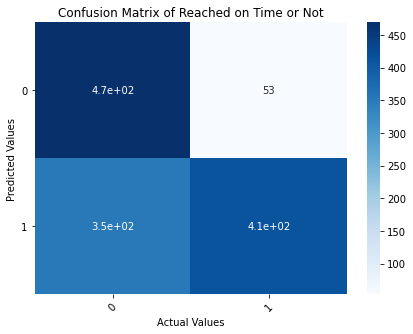

In [65]:
plt.figure(figsize = (7,5))
heatmap = sns.heatmap(cm_rf, annot = True, cmap = 'Blues')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation = 45)
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation = 0)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Confusion Matrix of Reached on Time or Not')
plt.show()

In [66]:
# Now let's use ROC curve for further analysis of the model

# Importing functions for roc_curve and auc score
from sklearn.metrics import roc_curve, roc_auc_score

In [67]:
# Now let's generate predict probabilities for the test dataset
pred_proba = rf_cls.predict_proba(X_test)[:,1]

# calculating TPR: True Positive Rate, FPT: False Positive Rate

fpr, tpr, thresholds = roc_curve(y_test, pred_proba)

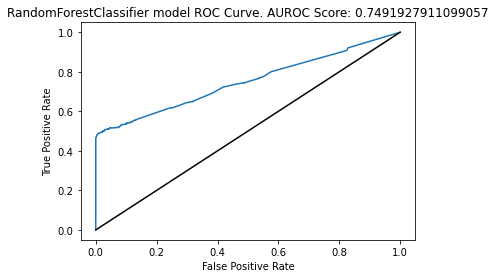

In [68]:
# ploting ROC Curve

plt.plot(fpr, tpr)
plt.plot(fpr, fpr, color = 'k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# calculating AUROC Score
auroc = roc_auc_score(y_test, pred_proba)
plt.title('RandomForestClassifier model ROC Curve. AUROC Score: {}'.format(auroc))
plt.show()

The graph show that the model has got an auroc score of 0.749 which is comparably low accuracy for the model. Let's use deep learning and see if the performance is increased or not.

### Deep Learning

In [69]:
# Importing required library

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [70]:
# Before moving to building model let's normalize the dataset.

# Import Library
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() # Creating Instance

# fitting & Transforming the data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [71]:
# Building s Sequential Model

model = Sequential()

model.add(Dense(units=11,activation='relu'))

model.add(Dense(units=22,activation='relu'))

model.add(Dense(units=22,activation='relu'))

model.add(Dense(units=11,activation='relu'))


model.add(Dense(units=1,activation='sigmoid'))

# Compiling the model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [72]:
# Fitting data to the model

model.fit(x=X_train, 
          y=y_train, 
          epochs=75,
          validation_data=(X_test, y_test), verbose=2
          )

Epoch 1/75
161/161 - 2s - loss: 0.6658 - val_loss: 0.6488 - 2s/epoch - 14ms/step
Epoch 2/75
161/161 - 0s - loss: 0.6114 - val_loss: 0.5772 - 484ms/epoch - 3ms/step
Epoch 3/75
161/161 - 1s - loss: 0.5590 - val_loss: 0.5454 - 504ms/epoch - 3ms/step
Epoch 4/75
161/161 - 1s - loss: 0.5418 - val_loss: 0.5356 - 620ms/epoch - 4ms/step
Epoch 5/75
161/161 - 1s - loss: 0.5351 - val_loss: 0.5302 - 540ms/epoch - 3ms/step
Epoch 6/75
161/161 - 0s - loss: 0.5312 - val_loss: 0.5292 - 442ms/epoch - 3ms/step
Epoch 7/75
161/161 - 0s - loss: 0.5283 - val_loss: 0.5259 - 424ms/epoch - 3ms/step
Epoch 8/75
161/161 - 0s - loss: 0.5263 - val_loss: 0.5307 - 400ms/epoch - 2ms/step
Epoch 9/75
161/161 - 0s - loss: 0.5247 - val_loss: 0.5241 - 337ms/epoch - 2ms/step
Epoch 10/75
161/161 - 0s - loss: 0.5237 - val_loss: 0.5240 - 381ms/epoch - 2ms/step
Epoch 11/75
161/161 - 0s - loss: 0.5235 - val_loss: 0.5243 - 360ms/epoch - 2ms/step
Epoch 12/75
161/161 - 0s - loss: 0.5242 - val_loss: 0.5255 - 395ms/epoch - 2ms/step
Epo

<AxesSubplot:>

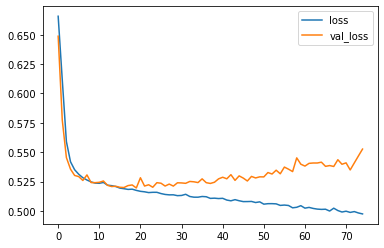

In [73]:
# Let's check the performance of the model

model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

We can see that after a centain point the loss is gradually decreasing but validation loss is not decreasing.

Now let's try to optimize the model by adding "EarlyStopping & Dropout" Layer.

In [74]:
# Importing library for EarlyStopping & Dropout layer
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

In [75]:
# Creating earlystopping instance
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [82]:
# Rebuilding the model

model = Sequential()

model.add(Dense(units=11,activation='relu'))
model.add(Dropout(0.5)) # adding dropout layer

model.add(Dense(units=22,activation='relu'))
model.add(Dropout(0.5)) # adding dropout layer

model.add(Dense(units=11,activation='relu'))
model.add(Dropout(0.5)) # adding dropout layer


model.add(Dense(units=1,activation='sigmoid'))

# Compiling the model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [83]:
# Fitting the model
model.fit(x=X_train, 
          y=y_train, 
          epochs=75,
          validation_data=(X_test, y_test), verbose=2,
          callbacks=[early_stop]
          )

Epoch 1/75
161/161 - 1s - loss: 0.6984 - val_loss: 0.6725 - 1s/epoch - 9ms/step
Epoch 2/75
161/161 - 0s - loss: 0.6774 - val_loss: 0.6676 - 390ms/epoch - 2ms/step
Epoch 3/75
161/161 - 0s - loss: 0.6680 - val_loss: 0.6577 - 401ms/epoch - 2ms/step
Epoch 4/75
161/161 - 0s - loss: 0.6578 - val_loss: 0.6414 - 359ms/epoch - 2ms/step
Epoch 5/75
161/161 - 0s - loss: 0.6516 - val_loss: 0.6189 - 349ms/epoch - 2ms/step
Epoch 6/75
161/161 - 0s - loss: 0.6320 - val_loss: 0.5913 - 367ms/epoch - 2ms/step
Epoch 7/75
161/161 - 0s - loss: 0.6168 - val_loss: 0.5613 - 454ms/epoch - 3ms/step
Epoch 8/75
161/161 - 0s - loss: 0.6033 - val_loss: 0.5506 - 348ms/epoch - 2ms/step
Epoch 9/75
161/161 - 0s - loss: 0.5957 - val_loss: 0.5413 - 452ms/epoch - 3ms/step
Epoch 10/75
161/161 - 0s - loss: 0.5842 - val_loss: 0.5325 - 365ms/epoch - 2ms/step
Epoch 11/75
161/161 - 0s - loss: 0.5849 - val_loss: 0.5363 - 369ms/epoch - 2ms/step
Epoch 12/75
161/161 - 0s - loss: 0.5764 - val_loss: 0.5328 - 366ms/epoch - 2ms/step
Epoc

<AxesSubplot:>

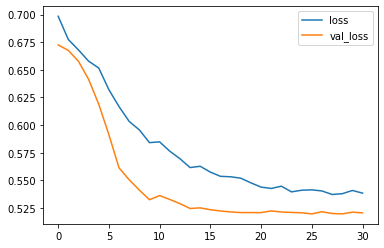

In [84]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

This time both loss and validation loss are going down and it stops at 55 epochs.

In [85]:
# Let's evaluate the model
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis = 1)

In [86]:
# Printing the evaluation
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.41      1.00      0.58       522
           1       0.00      0.00      0.00       763

    accuracy                           0.41      1285
   macro avg       0.20      0.50      0.29      1285
weighted avg       0.17      0.41      0.23      1285



In [87]:
print(confusion_matrix(y_test,predictions))

[[522   0]
 [763   0]]


Comparing the model the "RandomForestClassifier" is performing way better than this NN model So I'll keep the "ML" model for later use.

In [90]:
# Importing the model
import pickle
 
# Saving the model
with open('rf_model.pkl', 'wb') as model:
    pickle.dump(rf_cls, model)

In [91]:
model = open('rf_model.pkl','rb')
forest = pickle.load(model)

In [93]:
y_preds= rf_cls.predict(X_test)
y_preds

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)